# TODO

* Inheritance Probleme lösen
    * kriege den __filename iwie nicht mit...

In [2]:
import os
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog as fd
from tkinter.messagebox import showinfo

# test
def test():
    pass

class InputClass:
    #__filename = "test"
    def __init__(self):
        print("\nINIT\n")
        self.input_filename()

    def input_filename(self):
        print("\nINPUT FILENAME\n")
        return "THIS IS THE PARENT CLASS"
        
    def set_filename(self, filename):
        print("\nSET FILENAME\n")
        self.__filename = filename

    def get_filename(self):
        print("\nGETFILENAME\n")
        return self.__filename  

    def check_file(self, filename):
        print("\nCHECK FILE\n")
        if not os.path.isfile(filename):
            raise Exception("Datei konnte nicht gefunden werden")
        elif filename[-3:].lower() != "csv":
            raise Exception("Es handelt sich bei der Datei um keine CSV")
        else:
            print("Dateieingabe korrekt!")

    def get_input_file(self):
        print("\nGET INPUT FILE\n")
        try: 
            self.check_file(self.__filename)
            return self.__filename
        except Exception as e:
            print(f"{e}")
    


    
class TextInput(InputClass):

    def input_filename(self):
        loop = True
        while loop:
            try:
                filename = input("Bitte geben Sie hier den genauen Dateistring an: ")
                self.check_file(filename)
                self.set_filename(filename)
            except Exception as e:
                print(e)

                if input("\nFalsche Eingabe. Wiederholen? (j/n)").lower() != "j":
                    loop = False

    

class GUI_Input(InputClass):
    root = tk.Tk()
    root.title("File Input")
    root.resizable(False, False)
    root.geometry("300x150")

    def select_file(self):
        print("\nSELECT FILE\n")
        filetypes = (
        ("csv files", "*.csv"),
        ("All files", "*.*")
        )

        filename = fd.askopenfilename(
            title="Open file",
            #initialdir="/",
            filetypes=filetypes)
        

        showinfo(
            title="Selected File",
            message=filename
        )
        self.set_filename(filename)
        self.root.destroy()

    

    
    def input_filename(self):
        print("\n INPUT FILENAME \n")
        try:
            open_button = ttk.Button(
                self.root,
                text="Open a File",
                command=self.select_file
            )
            open_button.pack(expand=True)

            self.root.mainloop()
            print(self.get_filename())


        except Exception as e:
            print(e)
            


In [9]:
# csv_input = GUI_Input()
# csv_input.get_input_file()
# #csv_input.set_filename("test")
# print(csv_input.get_filename())

# csv_file = csv_input.get_filename()



In [17]:
import pandas as pd
import os

def get_df(csv_filestring):
    try:
        os.path.isfile(csv_file)
    except Exception as e:
        csv_file = "baume.csv"

    seperators = [",", ";", "\t",]
    print(csv_file)
    for sep in seperators:
        print("SEP:", sep)
        try:
            csv_skeleton_df = pd.read_csv(csv_file, sep=sep)
            return csv_skeleton_df
        except Exception as e:
            print(e)

        

# print(csv_skeleton_df.columns)
# csv_skeleton_df.head()



In [11]:


class AuswahlFenster():
    plot_types = ["plot (x,y)", "Boxplot", "Scatterplot", "Bar-plot", "Pie-plot", "Histogramm"]
    def __init__(self):
        self.root = tk.Tk()
        self.root.title("Plotauswahl")
        
        self.label = tk.Label(
            self.root, 
            text="Bitte wählen Sie aus,\nwie Ihre Daten geplotten werden sollen", 
            font=("Arial", 12))
        self.label.pack(padx=10, pady=10)

        # Dropdown-Auswahl
        self.plot_type = tk.StringVar(self.root, "Auswählen")
        self.dropdown = tk.OptionMenu(self.root, self.plot_type, *self.plot_types)
        self.dropdown.pack(padx=10, pady=10)
        
        # Button, der Fenster Schließt und Ausgewählten plot returnt
        self.button = tk.Button(self.root, text="OK", font=("Arial", 14), command=self.send_plot_type)
        self.button.pack(padx=10, pady=10)

        self.root.mainloop()


    def send_plot_type(self):
        message = f'Folgender plot wurde gewählt: {self.plot_type.get()}'
        showinfo(title="Auswahl", message=message)
        self.root.destroy()


Test = AuswahlFenster()

In [ ]:
# TODO für ein Mittel zur Übergabe der Plotauswahl geben (am besten via Dict)


In [16]:
import matplotlib as plt

class PlotFenster():
    def plot(self):
        # Muss für jede Klassse einzeln implementiert werden^??
        try:
            # TODO
            # graphen plotten und anzeigen
            pass
            
        except Exception as e:
            showinfo(title="FEHLER", message=f"Fehlermeldung:\n{e}")
            self.root.destroy()


    def set_message(self):
        self.__message = "ParentClass"
        pass


    

# auswahlfenster für 2 der Spalten zum ggeneinander plotten
class PlotFenster_XY(PlotFenster):
    def plot(self):

        print(self.__message)
        showinfo(title="ACHSEN", message=self.__message)

    def __init__(self, csv_columns):
        self.root = tk.Tk()

        self.root.title("Achsenwahl")

        self.label = tk.Label(self.root, text="Auswahl zum plotten treffen", font=("Arial", 18))
        self.label.pack(padx=10, pady=10)

        self.auswahl_frame = tk.Frame(self.root)
        self.auswahl_frame.columnconfigure(0, weight=1)
        self.auswahl_frame.columnconfigure(1, weight=1)
        
        self.x_label = tk.Label(self.auswahl_frame, text="x-Achse", font=("Arial", 12))
        self.x_label.grid(row=0, column=0, sticky="W E")

        self.y_label = tk.Label(self.auswahl_frame, text="y-Achse", font=("Arial", 12))
        self.y_label.grid(row=1, column=0, sticky="W E")

        self.x_col_var = tk.StringVar(self.auswahl_frame, "Auswählen")
        self.x_column = tk.OptionMenu(self.auswahl_frame, self.x_col_var, *csv_columns)
        self.x_column.grid(row=0, column=1, sticky="W E")

        self.y_col_var = tk.StringVar(self.auswahl_frame, "Auswählen")
        self.y_column = tk.OptionMenu(self.auswahl_frame, self.y_col_var, *csv_columns)
        self.y_column.grid(row=1, column=1, sticky="W E")
        
        self.set_message()

        self.auswahl_frame.pack(padx=10, pady=10)

        plot_button = tk.Button(self.root, text="Plotten!", font=("Arial", 14), command=self.plot)
        plot_button.pack(padx=10, pady=10)

        self.root.mainloop()

    


    



#test = AchsenWahlFenster(csv_skeleton_df.columns)



In [ ]:
plotfenster_dict = {
    "plot (x,y)": PlotFenster_XY,
    "Boxplot": PlotFenster_Box,
    "Scatterplot": PlotFenster_Scatter, 
    "Bar-plot": PlotFenster_Bar,
    "Pie-plot": PlotFenster_Pie, 
    "Histogramm": PlotFenster_Pie
}

PFLANZJAHR


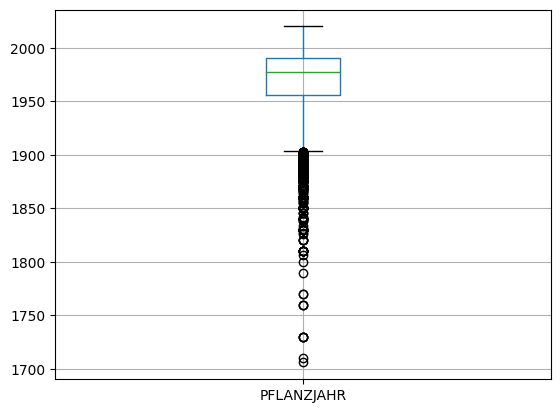

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

testdf = pd.read_csv("baume.csv", sep=";")
print(testdf.columns[2])
testdf.boxplot(column=testdf.columns[2])
plt.savefig()

In [18]:
Test_file = GUI_Input()
print("Klasse erstellt")
Test_file.get_input_file()
print("file geholt")
csv_file = Test_file.get_filename()
print("filestring gespeichert")

test_df = get_df(csv_file)
TestFenster = AuswahlFenster(test_df.columns)

plt.




INIT


 INPUT FILENAME 


SELECT FILE


SET FILENAME


GETFILENAME

C:/Users/phili/Desktop/UNI/Semester 7/Python Fortgeschritten/Python Gruppenprojekt/baume.csv
Klasse erstellt

GET INPUT FILE


CHECK FILE

Dateieingabe korrekt!
file geholt

GETFILENAME

filestring gespeichert
baume.csv
SEP: ,
Error tokenizing data. C error: Expected 2 fields in line 3, saw 3

SEP: ;
X-ACHSE: STAMM_DM
Y-ACHSE: HOEHE


In [13]:
class BeispielKlasse():
    def set_name(self, name):
        self.__name = name
    def get_name(self):
        return self.__name

class Test(BeispielKlasse):
    def __init__(self):
        name = input("Name: ")
        self.set_name(name)
        print(self.get_name())

a = Test()


In [14]:
a.get_name()

''